In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('Airline_Delay_Cause.csv')

top_carriers = ['UA', 'DL', 'AA', 'WN', 'AS', 'B6', 'F9']
data_filtered = data[data['carrier'].isin(top_carriers)]

airports_to_keep = ['SFO', 'OAK', 'SJC', 'LAX', 'DEN', 'PHX', 'SLC',
                    'ORD', 'DFW', 'MSP', 'STL', 'JFK', 'LGA', 'EWR', 'CLT', 'SEA', 'ATL']

data_filtered = data_filtered[data_filtered['airport'].isin(airports_to_keep)]
data_filtered

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
96,2023,8,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",759.0,225.0,67.14,14.76,...,0.21,104.17,16.0,5.0,20112.0,5665.0,950.0,2152.0,11.0,11334.0
116,2023,8,AA,American Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",10497.0,2500.0,636.40,143.81,...,9.07,1206.81,230.0,43.0,294629.0,110971.0,14250.0,29468.0,678.0,139262.0
122,2023,8,AA,American Airlines Inc.,DEN,"Denver, CO: Denver International",739.0,237.0,77.39,5.96,...,0.30,92.12,9.0,1.0,21177.0,6971.0,776.0,2876.0,29.0,10525.0
123,2023,8,AA,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",14953.0,3212.0,898.24,103.53,...,9.69,1683.67,151.0,45.0,376057.0,141614.0,7619.0,20738.0,537.0,205549.0
131,2023,8,AA,American Airlines Inc.,EWR,"Newark, NJ: Newark Liberty International",671.0,195.0,62.51,11.22,...,0.20,74.01,10.0,2.0,13847.0,4866.0,1221.0,2079.0,31.0,5650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171556,2013,8,WN,Southwest Airlines Co.,LGA,"New York, NY: LaGuardia",527.0,186.0,60.08,11.98,...,0.00,48.79,2.0,5.0,11258.0,2894.0,1148.0,4427.0,0.0,2789.0
171565,2013,8,WN,Southwest Airlines Co.,CLT,"Charlotte, NC: Charlotte Douglas International",183.0,51.0,24.13,4.32,...,0.00,16.82,0.0,0.0,2261.0,969.0,178.0,209.0,0.0,905.0
171569,2013,8,WN,Southwest Airlines Co.,SLC,"Salt Lake City, UT: Salt Lake City International",976.0,341.0,110.77,1.46,...,0.77,196.63,1.0,1.0,15033.0,3957.0,271.0,1149.0,16.0,9640.0
171572,2013,8,WN,Southwest Airlines Co.,STL,"St. Louis, MO: St Louis Lambert International",2648.0,628.0,203.47,10.62,...,7.73,337.07,4.0,0.0,27605.0,8038.0,1016.0,2690.0,202.0,15659.0


## Delay Predictions

In [ ]:
data_filtered['avg_delay'] = data_filtered['arr_delay'] / data_filtered['arr_flights']


# Aggregate
agg_data = data_filtered.groupby(['carrier', 'airport']).agg({'avg_delay': 'mean'}).reset_index()
agg_data.rename(columns={'arr_delay': 'avg_delay'}, inplace=True)


# Risk labels
def delay_risk(delay):
    if delay <= 10:
        return 'Low'
    elif delay <= 30:
        return 'Medium'
    else:
        return 'High'

agg_data['delay_risk'] = agg_data['avg_delay'].apply(delay_risk)
agg_data


,carrier,airport,avg_delay,delay_risk
0,AA,ATL,12.915488,Medium
1,AA,CLT,10.431390,Medium
2,AA,DEN,12.603072,Medium
3,AA,DFW,13.492340,Medium
4,AA,EWR,17.263851,Medium
...,...,...,...,...
107,WN,SEA,10.518496,Medium
108,WN,SFO,15.900263,Medium
109,WN,SJC,8.376464,Low
110,WN,SLC,10.558055,Medium


<ipython-input-21-6e3353605164>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table_num = pivot_table.applymap(lambda x: risk_to_num.get(x, np.nan))


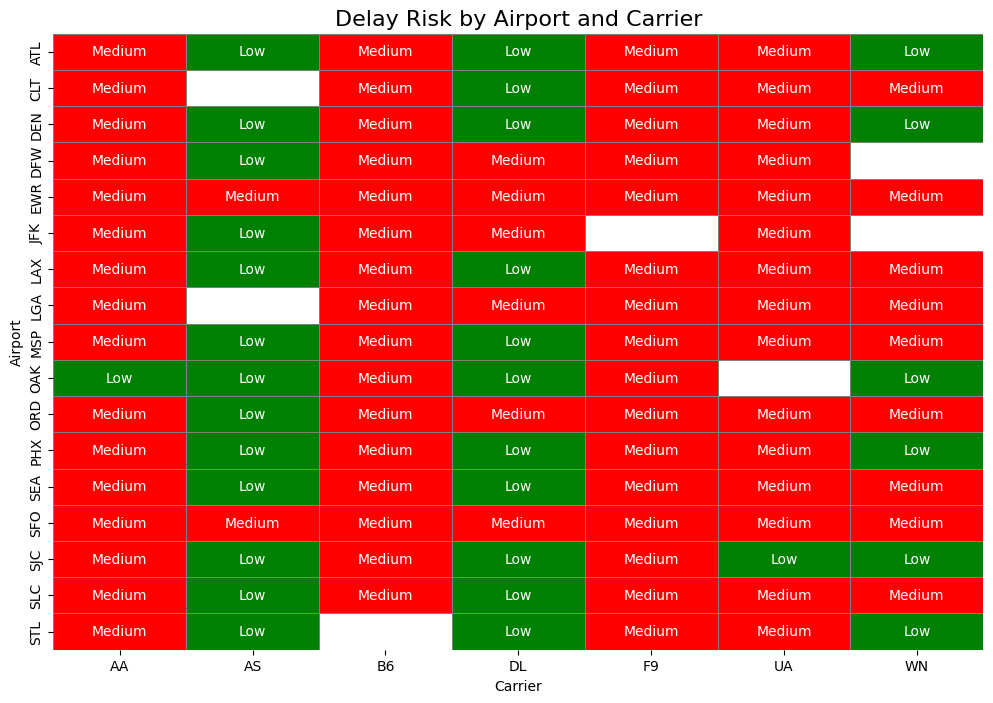

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Pivot to matrix
pivot_table = agg_data.pivot(index='airport', columns='carrier', values='delay_risk')

# Map risk to numbers for coloring
risk_to_num = {'Low': 0, 'Medium': 1, 'High': 2}
pivot_table_num = pivot_table.applymap(lambda x: risk_to_num.get(x, np.nan))

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table_num,
    annot=pivot_table,
    fmt='',
    cmap=sns.color_palette(['green', 'orange', 'red']),
    cbar=False,
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Delay Risk by Airport and Carrier', fontsize=16)
plt.ylabel('Airport')
plt.xlabel('Carrier')
plt.show()


MSE: 40.576130674068835
Accuracy: 0.9841394472361809


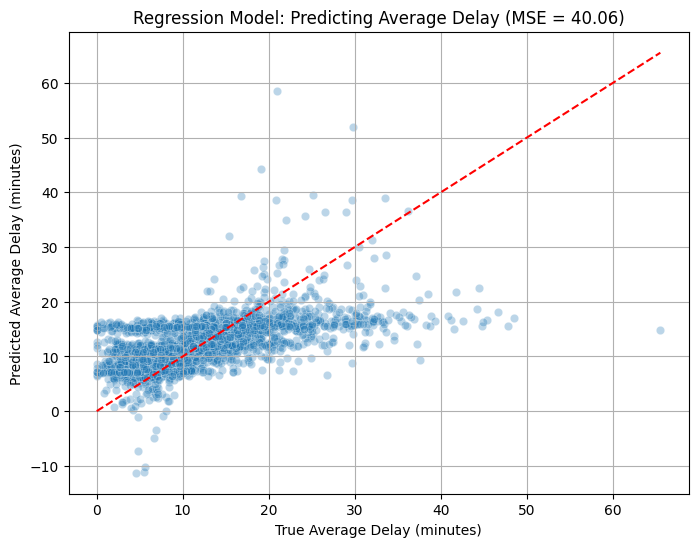

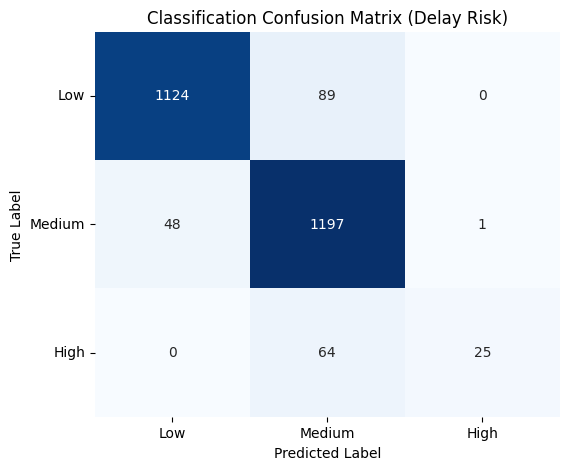

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

# Drop rows where arr_flights is 0 or NaN to avoid division by zero in avg_delay
data_filtered = data_filtered[(data_filtered['arr_flights'] > 0) & (data_filtered['arr_flights'].notna())]
# Recalculate avg_delay and delay_risk
data_filtered['avg_delay'] = data_filtered['arr_delay'] / data_filtered['arr_flights']
data_filtered['delay_risk'] = data_filtered['avg_delay'].apply(delay_risk)

# Encoding
encoder = OneHotEncoder()
X = encoder.fit_transform(agg_data[['carrier', 'airport']]).toarray()
y_reg = agg_data['avg_delay']
y_clf = agg_data['delay_risk']

# Prepare features again
X_cat = encoder.fit_transform(data_filtered[categorical_features])
X_num = imputer.fit_transform(data_filtered[numeric_features])
X = hstack([X_cat, X_num])

# Regression model
y_reg = data_filtered['avg_delay'].values
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

model_reg = LinearRegression()
model_reg.fit(X_train_r, y_train_r)
y_pred_r = model_reg.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_r)

# Classification model
y_clf = data_filtered['delay_risk'].values
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clf, test_size=0.2, random_state=42)

model_clf = RandomForestClassifier(n_estimators=100, random_state=42)
model_clf.fit(X_train_c, y_train_c)
y_pred_c = model_clf.predict(X_test_c)
conf_matrix = confusion_matrix(y_test_c, y_pred_c, labels=['Low', 'Medium', 'High'])

# Predictions
y_pred_reg = model_reg.predict(X)
y_pred_clf = model_clf.predict(X)

# Evaluation

print('MSE:', mean_squared_error(y_reg, y_pred_reg))
print('Accuracy:', accuracy_score(y_clf, y_pred_clf))


# Prepare results for plotting
regression_results = pd.DataFrame({'True Delay': y_test_r, 'Predicted Delay': y_pred_r})
classification_results = pd.DataFrame(conf_matrix, index=['Low', 'Medium', 'High'], columns=['Low', 'Medium', 'High'])

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot 1: Regression - True vs Predicted Delay
plt.figure(figsize=(8, 6))
sns.scatterplot(x='True Delay', y='Predicted Delay', data=regression_results, alpha=0.3)
plt.plot([0, regression_results['True Delay'].max()], [0, regression_results['True Delay'].max()], 'r--')
plt.title(f'Regression Model: Predicting Average Delay (MSE = {mse:.2f})')
plt.xlabel('True Average Delay (minutes)')
plt.ylabel('Predicted Average Delay (minutes)')
plt.grid(True)
plt.show()

# Plot 2: Classification - Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(classification_results, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Classification Confusion Matrix (Delay Risk)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.yticks(rotation=0)
plt.show()



## Cancellation Predictions

<ipython-input-2-b9f7edf1687d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['cancel_rate'] = data_filtered['arr_cancelled'] / data_filtered['arr_flights']
<ipython-input-2-b9f7edf1687d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['cancel_flag'] = (data_filtered['cancel_rate'] > 0.05).astype(int)


Confusion Matrix:
[[2367    7]
 [ 172    3]]

Classification Report (0 = not canceled, 1 = canceled):
                  precision    recall  f1-score   support

Not Canceled (0)       0.93      1.00      0.96      2374
    Canceled (1)       0.30      0.02      0.03       175

        accuracy                           0.93      2549
       macro avg       0.62      0.51      0.50      2549
    weighted avg       0.89      0.93      0.90      2549

Confusion Matrix:
[[1312 1062]
 [  31  144]]

Classification Report (0 = not canceled, 1 = canceled):
                  precision    recall  f1-score   support

Not Canceled (0)       0.98      0.55      0.71      2374
    Canceled (1)       0.12      0.82      0.21       175

        accuracy                           0.57      2549
       macro avg       0.55      0.69      0.46      2549
    weighted avg       0.92      0.57      0.67      2549



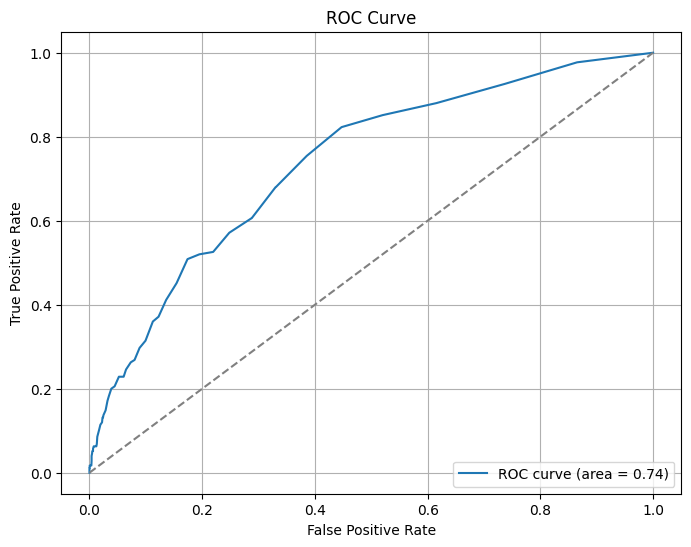

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from scipy.sparse import hstack
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("Airline_Delay_Cause.csv")

# Step 1: Filter top carriers and major airports
top_carriers = ['UA', 'DL', 'AA', 'WN', 'AS', 'B6', 'F9']
airports_to_keep = ['SFO', 'OAK', 'SJC', 'LAX', 'DEN', 'PHX', 'SLC',
                    'ORD', 'DFW', 'MSP', 'STL', 'JFK', 'LGA', 'EWR', 'CLT', 'SEA', 'ATL']

data_filtered = data[data['carrier'].isin(top_carriers)]
data_filtered = data_filtered[data_filtered['airport'].isin(airports_to_keep)]

# Step 2: Create binary cancellation label
data_filtered['cancel_rate'] = data_filtered['arr_cancelled'] / data_filtered['arr_flights']
data_filtered['cancel_flag'] = (data_filtered['cancel_rate'] > 0.05).astype(int)

# Define 0 and 1 clearly
# 0 = "flight group mostly normal" (<=5% cancel rate)
# 1 = "flight group problematic (>5% cancellations)"

# Step 3: Define feature columns
categorical_features = ['carrier', 'airport']
numeric_features = ['arr_flights', 'arr_delay', 'carrier_delay', 'weather_delay',
                    'nas_delay', 'security_delay', 'late_aircraft_delay']

# Step 4: Encode categorical features
encoder = OneHotEncoder()
X_cat_sparse = encoder.fit_transform(data_filtered[categorical_features])

# Step 5: Impute and prepare numeric features
imputer = SimpleImputer(strategy='mean')
X_num_imputed = imputer.fit_transform(data_filtered[numeric_features])

# Step 6: Combine features
X = hstack([X_cat_sparse, X_num_imputed])
y = data_filtered['cancel_flag'].values

# Step 7: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 8: Train model
clf = RandomForestClassifier(
    n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Step 9: Evaluate
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # probability of being "canceled" (class 1)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (0 = not canceled, 1 = canceled):")
print(classification_report(y_test, y_pred, target_names=["Not Canceled (0)", "Canceled (1)"]))


# Step 10: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]
y_pred_opt = (y_proba >= best_threshold).astype(int)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_opt))
print("\nClassification Report (0 = not canceled, 1 = canceled):")
print(classification_report(y_test, y_pred_opt, target_names=["Not Canceled (0)", "Canceled (1)"]))

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Predict cancellation probability for every row
cancellation_probs = clf.predict_proba(X)[:, 1]  # probability of class 1 (canceled)

data_filtered['cancel_probability'] = cancellation_probs
data_filtered

# Get all unique (carrier, airport) pairs in the dataset
carrier_airport_combos = data_filtered[['carrier', 'airport']].drop_duplicates()
carrier_airport_combos

# 3. Group by (carrier, airport) to compute average predicted risk
avg_cancellation_probs = data_filtered.groupby(['carrier', 'airport'])['cancel_probability'].mean().reset_index()

# 4. Rename for clarity
avg_cancellation_probs.rename(columns={'cancel_probability': 'avg_predicted_cancel_prob'}, inplace=True)

# 5. Preview
avg_cancellation_probs

# 6. Export to CSV
avg_cancellation_probs.to_csv('avg_predicted_cancellation_risk.csv', index=False)




In [ ]:
# Re-import necessary tools
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'class_weight': ['balanced']
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Run hyperparameter search
random_search.fit(X_train, y_train)

# Use best model to predict and compute AUC
best_model = random_search.best_estimator_
y_proba_best = best_model.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

roc_auc_best


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
33 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

np.float64(0.76141292574317)

In [ ]:
# Step 11: Feature Importance

# Get feature names from encoder + numeric columns
cat_feature_names = encoder.get_feature_names_out(categorical_features)
feature_names = list(cat_feature_names) + numeric_features

# Get importances
importances = clf.feature_importances_

# Put into a DataFrame for easier viewing
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Print top features
print("Top 20 Features Important for Cancellation Prediction:")
print(feature_importance_df.head(20))


Top 20 Features Important for Cancellation Prediction:
                feature  importance
24          arr_flights    0.147272
30  late_aircraft_delay    0.124323
28            nas_delay    0.123980
25            arr_delay    0.123098
26        carrier_delay    0.121210
27        weather_delay    0.108409
29       security_delay    0.041395
14          airport_LGA    0.026159
3            carrier_DL    0.014541
11          airport_EWR    0.014507
2            carrier_B6    0.010553
5            carrier_UA    0.009910
6            carrier_WN    0.009325
1            carrier_AS    0.008951
0            carrier_AA    0.008815
8           airport_CLT    0.008193
4            carrier_F9    0.007670
22          airport_SLC    0.007605
17          airport_ORD    0.007210
19          airport_SEA    0.007105
